# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotnine import *

import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

%matplotlib inline

In [3]:
df = pd.read_csv(r'data/Train.csv')

In [4]:
df.sample(5).T

,3853,374,1304,1874,4158
ID,tour_5678,tour_146,tour_2602,tour_3278,tour_6040
country,ITALY,SOUTH AFRICA,ITALY,NETHERLANDS,JAPAN
age_group,25-44,25-44,1-24,25-44,1-24
travel_with,Spouse,Alone,NaN,Spouse,NaN
total_female,1.0,0.0,0.0,1.0,1.0
total_male,1.0,1.0,1.0,1.0,0.0
purpose,Leisure and Holidays,Business,Visiting Friends and Relatives,Leisure and Holidays,Scientific and Academic
main_activity,Cultural tourism,Beach tourism,Beach tourism,Wildlife tourism,Hunting tourism
info_source,"Friends, relatives","Radio, TV, Web","Friends, relatives","Newspaper, magazines,brochures",others
tour_arrangement,Package Tour,Independent,Independent,Independent,Package Tour


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [6]:
df.shape

(4809, 23)

In [7]:
df.isnull().sum()/df.shape[0]*100

ID                        0.000000
country                   0.000000
age_group                 0.000000
travel_with              23.164899
total_female              0.062383
total_male                0.103972
purpose                   0.000000
main_activity             0.000000
info_source               0.000000
tour_arrangement          0.000000
package_transport_int     0.000000
package_accomodation      0.000000
package_food              0.000000
package_transport_tz      0.000000
package_sightseeing       0.000000
package_guided_tour       0.000000
package_insurance         0.000000
night_mainland            0.000000
night_zanzibar            0.000000
payment_mode              0.000000
first_trip_tz             0.000000
most_impressing           6.508630
total_cost                0.000000
dtype: float64

## 1. Univariate Analysis

#### 1a. Age Group

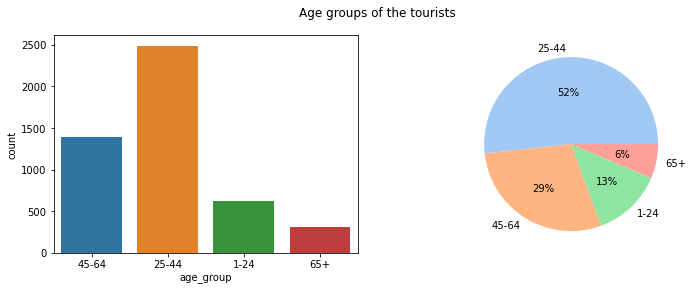

In [10]:
# Series
age_df = df['age_group'].value_counts()

# Labels
age_labels = df['age_group'].unique()

# Colour theme
age_colours = sns.color_palette('pastel')[0:4]

fig8, axes8 = plt.subplots(1,2, figsize=[12,4])

fig8.suptitle('Age groups of the tourists')

# Bar plot
sns.countplot(ax=axes8[0], data=df, x='age_group')
# Pie Chart
axes8[1].pie(x=age_df, labels=age_df.index, colors=age_colours, autopct='%.0f%%')

plt.show()

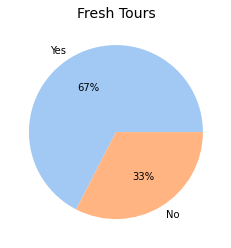

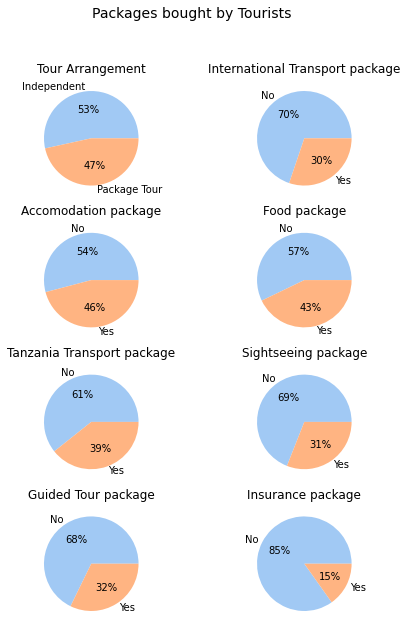

In [68]:
# Series
fi_df = df['first_trip_tz'].value_counts()
tr_df = df['tour_arrangement'].value_counts() 
pti_df = df['package_transport_int'].value_counts()
pa_df = df['package_accomodation'].value_counts()
pf_df = df['package_food'].value_counts()
ptt_df = df['package_transport_tz'].value_counts()
ps_df = df['package_sightseeing'].value_counts()
pgt_df = df['package_guided_tour'].value_counts()
pi_df = df['package_insurance'].value_counts()

# Colour palettes
yn_colours = sns.color_palette('pastel')[0:2]

plt.pie(x=fi_df, labels=fi_df.index, colors=yn_colours, autopct='%.0f%%')
plt.title('Fresh Tours', size=14)
plt.show()

fig, axes = plt.subplots(4,2, figsize=[7,10])

fig.suptitle('Packages bought by Tourists', size=14)

axes[0,0].pie(x=tr_df, labels=tr_df.index, colors=yn_colours, autopct='%.0f%%')
axes[0,0].set_title('Tour Arrangement')

axes[0,1].pie(x=pti_df, labels=pti_df.index, colors=yn_colours, autopct='%.0f%%')
axes[0,1].set_title('International Transport package')

axes[1,0].pie(x=pa_df, labels=pa_df.index, colors=yn_colours, autopct='%.0f%%')
axes[1,0].set_title('Accomodation package')

axes[1,1].pie(x=pf_df, labels=pf_df.index, colors=yn_colours, autopct='%.0f%%')
axes[1,1].set_title('Food package')

axes[2,0].pie(x=ptt_df, labels=ptt_df.index, colors=yn_colours, autopct='%.0f%%')
axes[2,0].set_title('Tanzania Transport package')

axes[2,1].pie(x=ps_df, labels=ps_df.index, colors=yn_colours, autopct='%.0f%%')
axes[2,1].set_title('Sightseeing package')

axes[3,0].pie(x=pgt_df, labels=pgt_df.index, colors=yn_colours, autopct='%.0f%%')
axes[3,0].set_title('Guided Tour package')

axes[3,1].pie(x=pi_df, labels=pi_df.index, colors=yn_colours, autopct='%.0f%%')
axes[3,1].set_title('Insurance package')

plt.show()

#### 1b. Number of Female Tourists

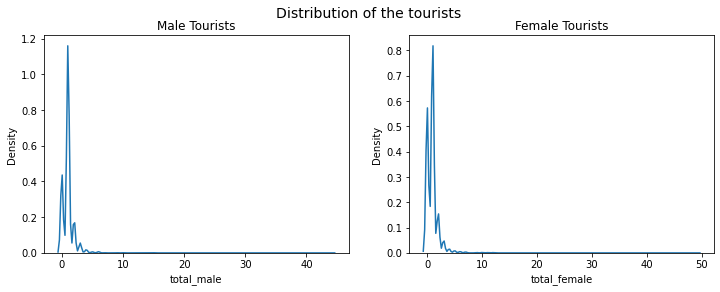

In [65]:
fig1, axes1 = plt.subplots(1,2, figsize=[12,4])

fig1.suptitle('Distribution of the tourists', size=14)

sns.kdeplot(ax=axes1[0], data=df, x='total_male')
axes1[0].set_title('Male Tourists')

sns.kdeplot(ax=axes1[1], data=df, x='total_female')
axes1[1].set_title('Female Tourists')

plt.show()

#### 1c. Total Tour Expenditure

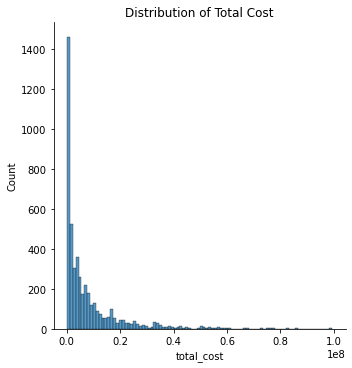

In [13]:
sns.displot(data=df, x='total_cost')
plt.title('Distribution of Total Cost')
plt.show()

#### 1d. Source of Information for the tour

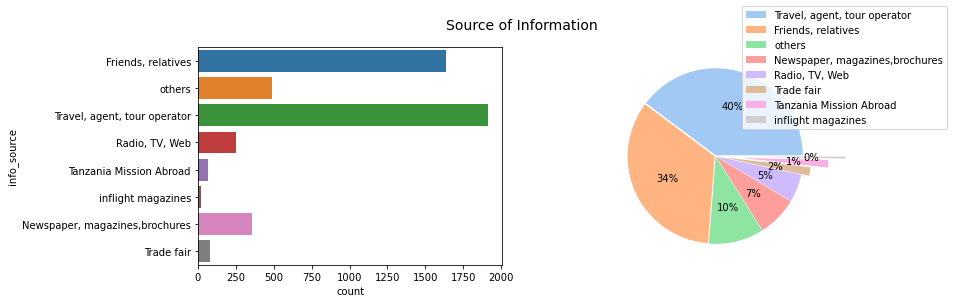

In [160]:
# Series
source_df = df['info_source'].value_counts()

# Colour theme
source_colours = sns.color_palette('pastel')[0:8]
explode_source = (0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.3, 0.5)

fig7, axes7 = plt.subplots(1,2, figsize=[12,4])

fig7.suptitle('Source of Information', size=14)

# Bar plot
sns.countplot(ax=axes7[0], data=df, y='info_source')
# Pie Chart
axes7[1].pie(x=source_df, colors=source_colours, explode=explode_source, autopct='%.0f%%')
axes7[1].legend(labels=source_df.index, loc=3, bbox_to_anchor=[0.6,0.6])

plt.show()

#### 1e. Purpose of Tour

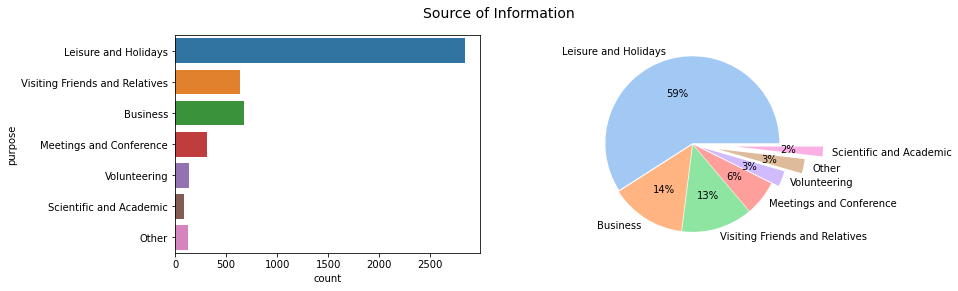

In [80]:
# Series
pp_df = df['purpose'].value_counts()

# Colour theme
pp_colours = sns.color_palette('pastel')[0:7]
explode_pp = (0.01, 0.01, 0.01, 0.01, 0.1, 0.3, 0.5)

fig11, axes11 = plt.subplots(1,2, figsize=[12,4])

fig11.suptitle('Source of Information', size=14)

# Bar plot
sns.countplot(ax=axes11[0], data=df, y='purpose')
# Pie Chart
axes11[1].pie(x=pp_df, labels=pp_df.index, colors=pp_colours, explode=explode_pp, autopct='%.0f%%')

plt.show()

#### 1f. Number of nights spent in Mainland

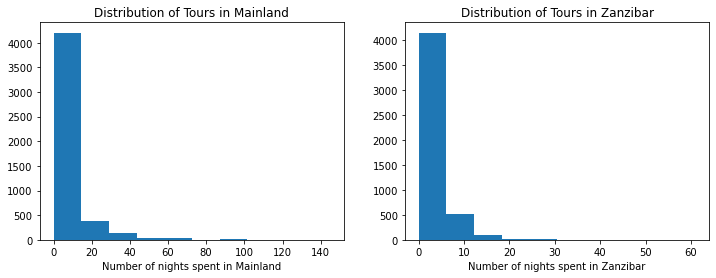

In [16]:
fig2, axes2 = plt.subplots(1,2, figsize=[12,4])

axes2[0].hist(df['night_mainland'])
axes2[0].set_title('Distribution of Tours in Mainland')
axes2[0].set_xlabel('Number of nights spent in Mainland')

axes2[1].hist(df['night_zanzibar'])
axes2[1].set_title('Distribution of Tours in Zanzibar')
axes2[1].set_xlabel('Number of nights spent in Zanzibar')

plt.show()

#### 1g. Mode of Payment

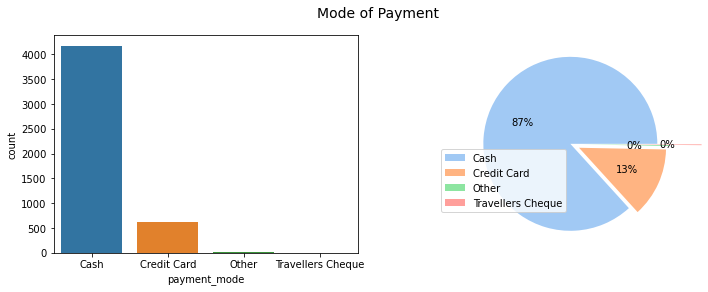

In [156]:
# Series
pay_df = df['payment_mode'].value_counts()

# Colour theme
pay_colours = sns.color_palette('pastel')[0:4]
explode_pay = (0.01, 0.1, 0.13, 0.5)

fig4, axes4 = plt.subplots(1,2, figsize=[12,4])

fig4.suptitle('Mode of Payment', size=14)

# Bar plot
sns.countplot(ax=axes4[0], data=df, x='payment_mode')
# Pie Chart
axes4[1].pie(x=pay_df, colors=pay_colours, explode=explode_pay, autopct='%.0f%%')
axes4[1].legend(labels=pay_df.index, loc=1, bbox_to_anchor=[0.5,0.5])

plt.show()

#### 1h. Most Impressive aspects of the tour

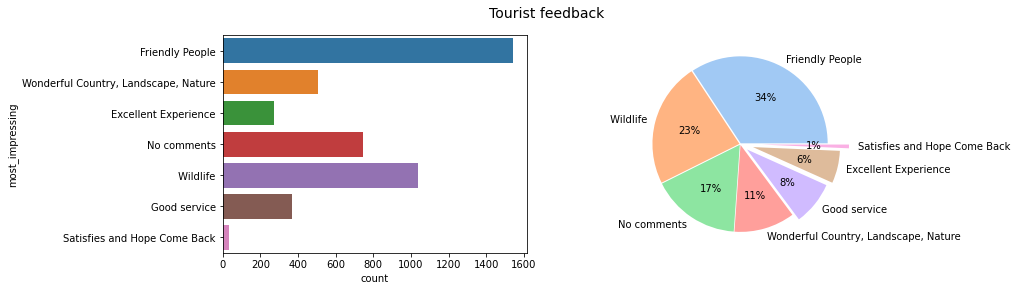

In [59]:
# Series
imp_df = df['most_impressing'].value_counts()

# Colour theme
imp_colours = sns.color_palette('pastel')[0:8]
explode_imp = (0.01, 0.01, 0.01, 0.01, 0.1, 0.15, 0.25)

fig5, axes5 = plt.subplots(1,2, figsize=[12,4])

fig5.suptitle('Tourist feedback', size=14)

# Bar plot
sns.countplot(ax=axes5[0], data=df, y='most_impressing')
# Pie Chart
axes5[1].pie(x=imp_df, labels=imp_df.index, colors=imp_colours, explode=explode_imp, autopct='%.0f%%')

plt.show()

#### 1i. Travel Companions for the tour

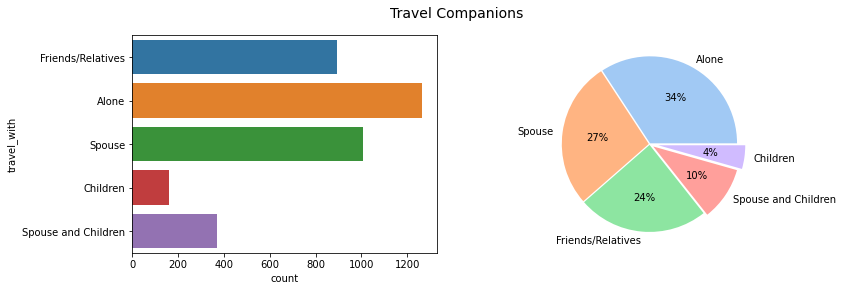

In [58]:
# Series
travel_df = df['travel_with'].value_counts()

# Colour theme
travel_colours = sns.color_palette('pastel')[0:8]
explode_travel = (0.01, 0.01, 0.01, 0.05, 0.1)

fig6, axes6 = plt.subplots(1,2, figsize=[12,4])

fig6.suptitle('Travel Companions', size=14)

# Bar plot
sns.countplot(ax=axes6[0], data=df, y='travel_with')
# Pie Chart
axes6[1].pie(x=travel_df, labels=travel_df.index, colors=travel_colours, explode=explode_travel, autopct='%.0f%%')

plt.show()

#### 1j. Tour Main Activity

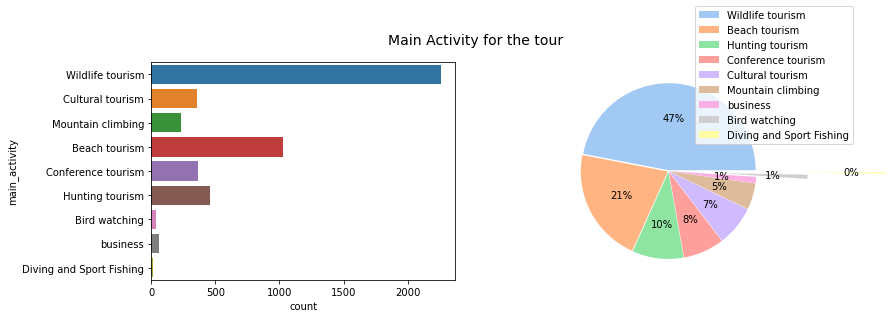

In [154]:
# Series
ma_df = df['main_activity'].value_counts()

# Colour theme
ma_colours = sns.color_palette('pastel')[0:9]
explode_ma = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.6, 1.5)

fig13, axes13 = plt.subplots(1,2, figsize=[12,4])

fig13.suptitle('Main Activity for the tour', size=14)

# Bar plot
sns.countplot(ax=axes13[0], data=df, y='main_activity')
# Pie Chart
axes13[1].pie(x=ma_df, colors=ma_colours, explode=explode_ma, autopct='%.0f%%')
axes13[1].legend(labels=ma_df.index, loc=3, bbox_to_anchor=[0.6, 0.6])

plt.show()

## 2. Bivariate Analysis

#### 2a. Spending Behaviour based on tour freshness

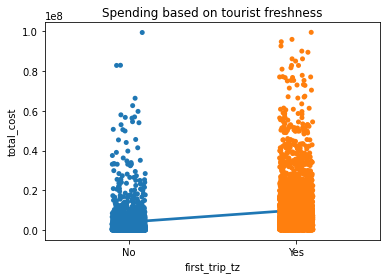

In [20]:
sns.stripplot(data=df, x='first_trip_tz', y='total_cost')
sns.pointplot(data=df, x='first_trip_tz', y='total_cost')
plt.title('Spending based on tourist freshness')
plt.show()

#### 2b. Spending based on mode of payment

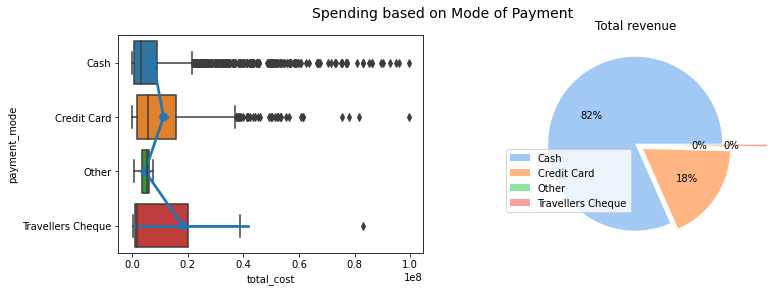

In [146]:
# Series
pay_gr = df.groupby('payment_mode')['total_cost'].sum()

fig10, axes10 = plt.subplots(1,2, figsize=[12,4])

fig10.suptitle('Spending based on Mode of Payment', size=14)

# Bar plot
sns.boxplot(ax=axes10[0], data=df, y='payment_mode', x='total_cost')
sns.pointplot(ax=axes10[0], data=df, y='payment_mode', x='total_cost')
# Pie Chart
axes10[1].pie(x=pay_gr, colors=pay_colours, explode=explode_pay, autopct='%.0f%%')
axes10[1].set_title('Total revenue')
axes10[1].legend(labels=pay_gr.index, loc=1, bbox_to_anchor=[0.5, 0.5])

plt.show()

#### 2c. Spending Based on Travel Companion

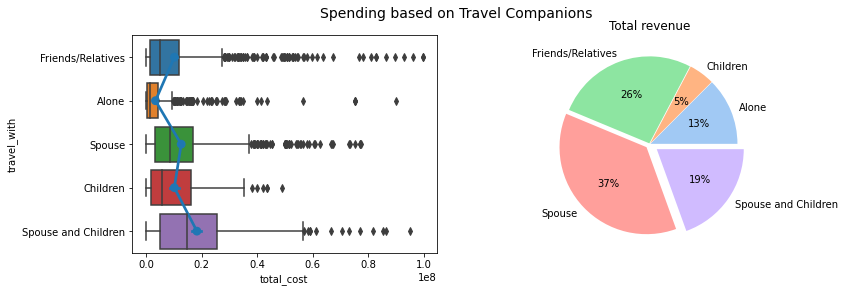

In [74]:
# Series
tr_gr = df.groupby('travel_with')['total_cost'].sum()

fig9, axes9 = plt.subplots(1,2, figsize=[12,4])

fig9.suptitle('Spending based on Travel Companions', size=14)

# Bar plot
sns.boxplot(ax=axes9[0], data=df, x='total_cost', y='travel_with')
sns.pointplot(ax=axes9[0], data=df, x='total_cost', y='travel_with')
# Pie Chart
axes9[1].pie(x=tr_gr, labels=tr_gr.index, colors=travel_colours, explode=explode_travel, autopct='%.0f%%')
axes9[1].set_title('Total revenue')

plt.show()

#### 2d. Spending based on age group

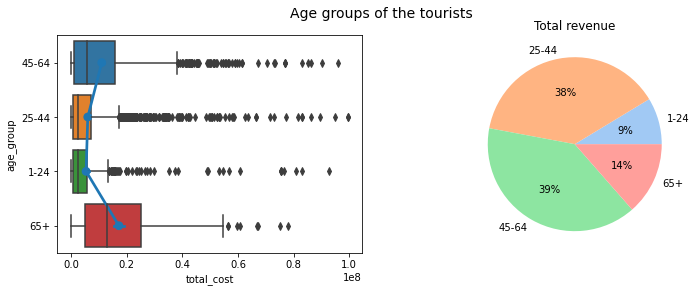

In [52]:
# Series
age_gr = df.groupby('age_group')['total_cost'].sum()

fig10, axes10 = plt.subplots(1,2, figsize=[12,4])

fig10.suptitle('Age groups of the tourists', size=14)

# Bar plot
sns.boxplot(ax=axes10[0], data=df, y='age_group', x='total_cost')
sns.pointplot(ax=axes10[0], data=df, y='age_group', x='total_cost')
# Pie Chart
axes10[1].pie(x=age_gr, labels=age_gr.index, colors=age_colours, autopct='%.0f%%')
axes10[1].set_title('Total revenue')

plt.show()

#### 1e. Purpose of Tour

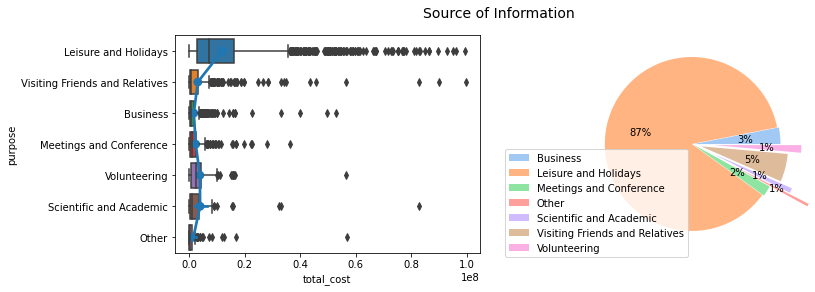

In [144]:
# Series
pp_gr = df.groupby('purpose')['total_cost'].sum()

explode_pp1 = [0.01, 0.01, 0.01, 0.5, 0.25, 0.1, 0.25]

fig12, axes12 = plt.subplots(1,2, figsize=[12,4])

fig12.suptitle('Source of Information', size=14)

# Bar plot
sns.boxplot(ax=axes12[0], data=df, y='purpose', x='total_cost')
sns.pointplot(ax=axes12[0], data=df, y='purpose', x='total_cost')
# Pie Chart
axes12[1].pie(x=pp_gr, colors=pp_colours, explode=explode_pp1, autopct='%.0f%%')

axes12[1].legend(labels=pp_gr.index, loc=1, bbox_to_anchor=[0.5, 0.5])

plt.show()

#### 1f. Tour Main Activity

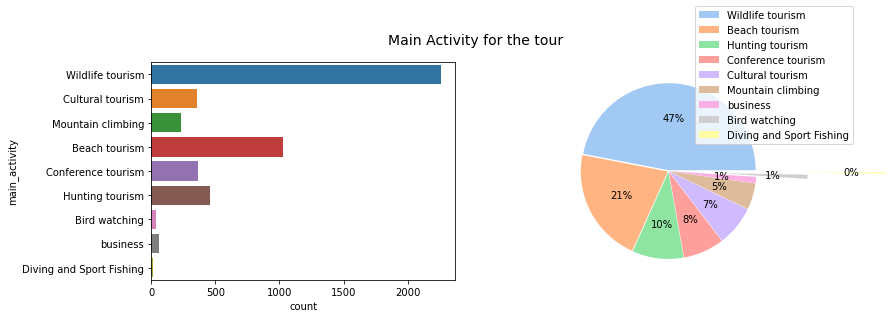

In [161]:
# Series
ma_df = df['main_activity'].value_counts()

# Colour theme
ma_colours = sns.color_palette('pastel')[0:9]
explode_ma = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.6, 1.5)

fig13, axes13 = plt.subplots(1,2, figsize=[12,4])

fig13.suptitle('Main Activity for the tour', size=14)

# Bar plot
sns.countplot(ax=axes13[0], data=df, y='main_activity')
# Pie Chart
axes13[1].pie(x=ma_df, colors=ma_colours, explode=explode_ma, autopct='%.0f%%')
axes13[1].legend(labels=ma_df.index, loc=3, bbox_to_anchor=[0.6,0.6])

plt.show()